### PyLadiesのロゴの類似度を調べてみよう
このページからロゴを集めて類似度を調べてみる  
https://www.pyladies.com/locations/  
  
色じゃなくて、ロゴキャラクターの特徴点を調べて類似度を図ります  
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_feature2d/py_matcher/py_matcher.html

In [1]:
import sys
sys.path.append('/Users/natsuko/pyladies/opencv/venv/lib/python3.7/site-packages')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMG_DIR = 'logo/'
# TARGET_IMG = 'logo/pyladies-tokyo-20150830.png'
TARGET_IMG = 'logo/tokyo.png'
SIZE = (200, 200)

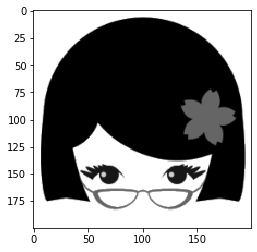

In [3]:
target_img_gray = cv2.imread(TARGET_IMG, cv2.IMREAD_GRAYSCALE)
target_img_gray = cv2.resize(target_img_gray, SIZE)
# plt.imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))
plt.imshow(target_img_gray, cmap='gray')

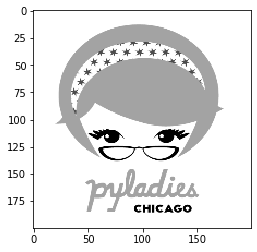

In [4]:
img = cv2.imread('logo/pyladies_chicago.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, SIZE)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img, cmap='gray')

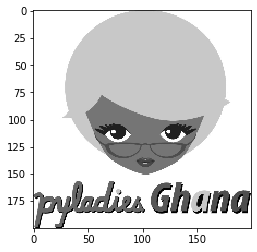

In [5]:
img = cv2.imread('logo/pyladies_ghana.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, SIZE)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img, cmap='gray')

In [6]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
detector = cv2.AKAZE_create()
(target_kp, target_des) = detector.detectAndCompute(target_img_gray, None)

# 比較対象となる各地のロゴ画像を読み込んで、類似度を算出し、結果をdictに保存
result_dict = {}
files = os.listdir(IMG_DIR)
for file in files:
    if file.startswith('pyladies'):
        #  画像の読み込み
        comparing_img_path = IMG_DIR + file
        comparing_img = cv2.imread(comparing_img_path, cv2.IMREAD_GRAYSCALE)
        # 画像のサイズを揃える
        comparing_img = cv2.resize(comparing_img, SIZE)
        # AKAZE特徴量を利用して類似度を算出
        (comparing_kp, comparing_des) = detector.detectAndCompute(comparing_img, None)
        matches = bf.match(target_des, comparing_des)
        dist = [m.distance for m in matches]
        ret = sum(dist) / len(dist)

        result_dict[file] = ret

In [7]:
result_dict

{'pyladies_ghana.jpg': 133.22093023255815,
 'pyladies-remote.png': 123.12790697674419,
 'pyladies-rural.jpg': 112.06976744186046,
 'pyladies_spb.png': 113.8953488372093,
 'pyladies_sorocaba_logo.jpg': 134.43023255813952,
 'pyladies_edinburgh_logo2.png': 115.40697674418605,
 'pyladies-silicion-logo.png': 126.52325581395348,
 'pyladies_lapaz.png': 126.59302325581395,
 'pyladies_campinas.png': 111.83720930232558,
 'pyladies_maceio.png': 123.8953488372093,
 'pyladies-tokyo-20150830.png': 109.56976744186046,
 'pyladies_hamburg.png': 128.63953488372093,
 'pyladiesimologo.png': 133.7906976744186,
 'pyladies_grandrapids.png': 120.44186046511628,
 'pyladies_manaus.png': 107.34883720930233,
 'pyladies_cdmx.png': 118.22093023255815,
 'pyladies-addis.png': 135.27906976744185,
 'pyladies_colorado.png': 105.17441860465117,
 'pyladies_sulmg.png': 85.46511627906976,
 'pyladies_la.jpeg': 135.8139534883721,
 'pyladies_chicago.png': 131.6627906976744,
 'pyladies_ec.png': 124.05813953488372,
 'pyladies_kz

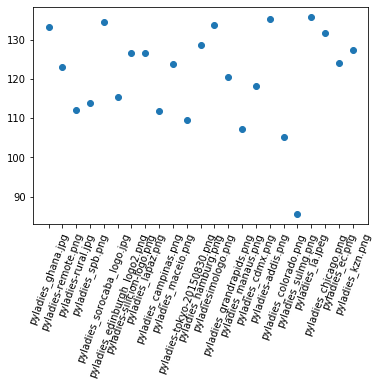

In [8]:
# 結果を一枚の画像にマッピング
plt.scatter(range(len(result_dict)), result_dict.values())
plt.xticks(range(len(result_dict)), result_dict.keys(), rotation=70)
plt.show()

In [9]:
# 類似度の高いロゴ上位3つ
sorted(result_dict.items(), key=lambda x: x[1], reverse=True)[:3]

[('pyladies_la.jpeg', 135.8139534883721),
 ('pyladies-addis.png', 135.27906976744185),
 ('pyladies_sorocaba_logo.jpg', 134.43023255813952)]

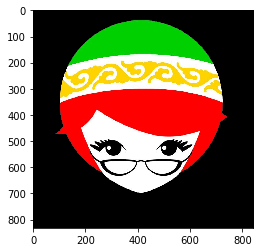

In [10]:
# 画像確認
# 1位　ロシアのカザン（ロシア連邦・タタールスタン共和国の首都）
img = cv2.imread('logo/pyladies_kzn.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

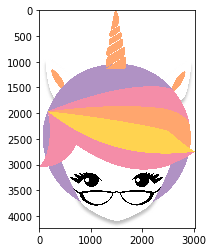

In [11]:
# 2位　ソロカバ（ブラジル　サンパウロ州）
img = cv2.imread('logo/pyladies_sorocaba_logo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

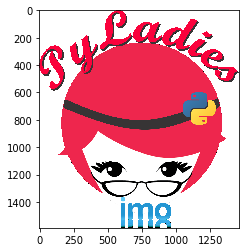

In [12]:
# 3位　イモ（ナイジェリア）
img = cv2.imread('logo/pyladiesimologo.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
# 色の特徴を比較してみる
files = os.listdir(IMG_DIR)
target_img = cv2.imread(TARGET_IMG)
# 画像のヒストグラム
target_hist = cv2.calcHist([target_img], [0], None, [256], [0, 256])
hist_dict = {}
for file in files:
    if file.startswith('pyladies'):

        comparing_img_path = IMG_DIR + file
        comparing_img = cv2.imread(comparing_img_path)
        comparing_img = cv2.resize(comparing_img, SIZE)
        comparing_hist = cv2.calcHist([comparing_img], [0], None, [256], [0, 256])

        ret = cv2.compareHist(target_hist, comparing_hist, 0)
        hist_dict[file] = ret

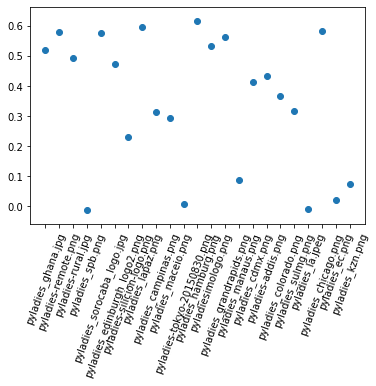

In [14]:
plt.scatter(range(len(hist_dict)), hist_dict.values())
plt.xticks(range(len(result_dict)), result_dict.keys(), rotation=70)
plt.show()

In [15]:
# 色が似ているロゴ上位3つ
sorted(hist_dict.items(), key=lambda x: x[1], reverse=True)[:3]

[('pyladies_hamburg.png', 0.6172735053529277),
 ('pyladies_lapaz.png', 0.5982813901756615),
 ('pyladies_chicago.png', 0.582477223857938)]

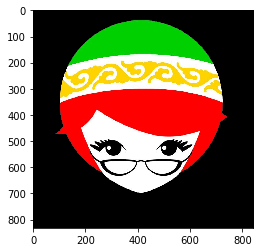

In [16]:
# 1位　カザン（ロシア）
img = cv2.imread('logo/pyladies_kzn.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

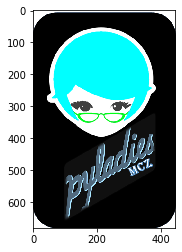

In [17]:
# 2位　
img = cv2.imread('logo/pyladies_maceio.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

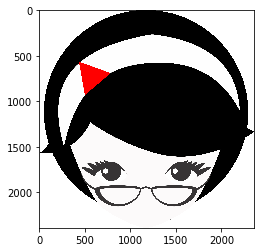

In [18]:
img = cv2.imread('logo/pyladies_sulmg.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

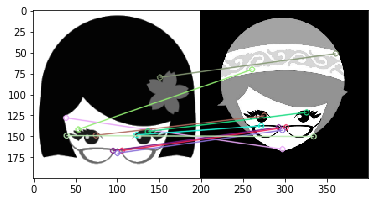

In [19]:
# 特徴点の抽出、比較
img1 = cv2.imread('logo/pyladies_kzn.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, SIZE)
target_img_gray = cv2.resize(target_img_gray, SIZE)
akaze = cv2.AKAZE_create()
kp, des = akaze.detectAndCompute(target_img_gray, None)
kp1, des1 = akaze.detectAndCompute(img1, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des, des1)
matches = sorted(matches, key = lambda x: x.distance)
result_img = cv2.drawMatches(target_img_gray, kp, img1, kp1, matches[:10], None, flags=2)
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

In [20]:
def compare_akaze(target_img, img_path):
    target_img = cv2.resize(target_img, (200, 200))
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (200, 200))
    akaze = cv2.AKAZE_create()
    kp, des = akaze.detectAndCompute(target_img, None)
    kp1, des1 = akaze.detectAndCompute(img, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des, des1)
    matches = sorted(matches, key = lambda x: x.distance)
    result_img = cv2.drawMatches(target_img, kp, img, kp1, matches[:10], None, flags=2)
    return result_img

In [21]:
img2 = compare_akaze(target_img_gray, 'logo/pyladies_sorocaba_logo.jpg')
img3 = compare_akaze(target_img_gray, 'logo/pyladiesimologo.png')

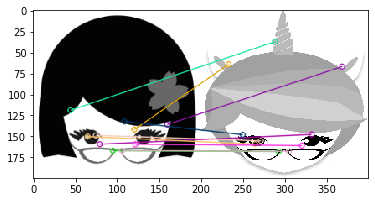

In [22]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

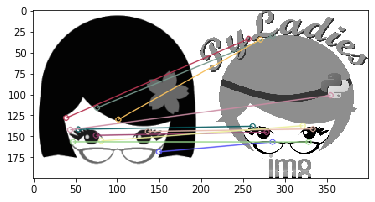

In [23]:
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


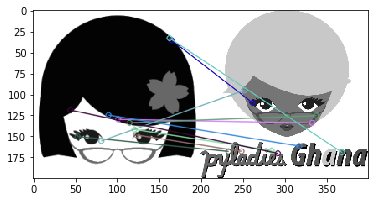

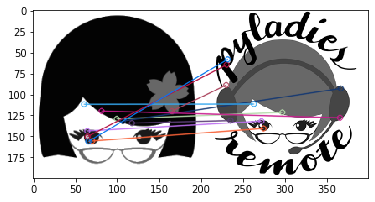

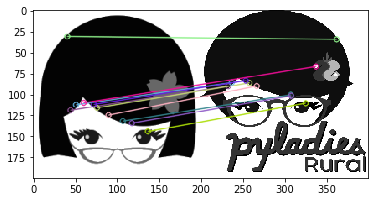

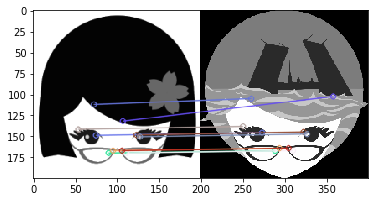

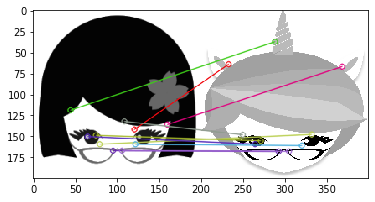

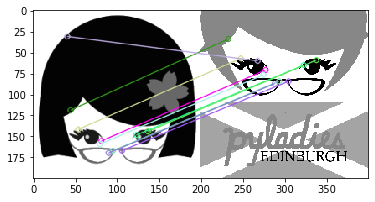

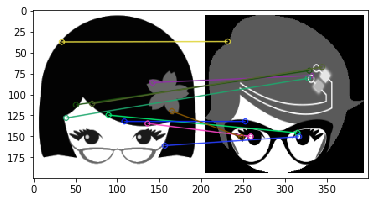

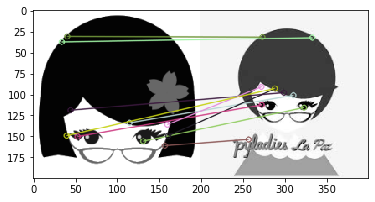

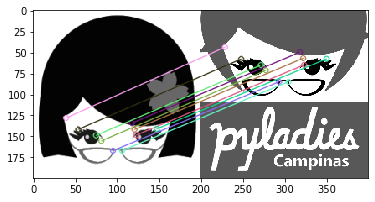

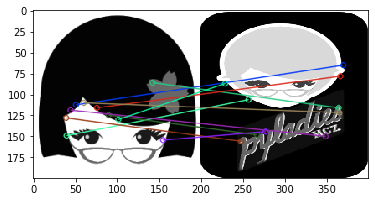

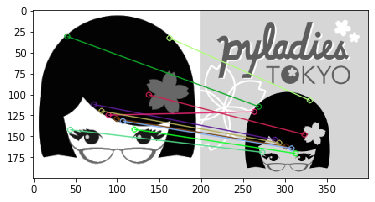

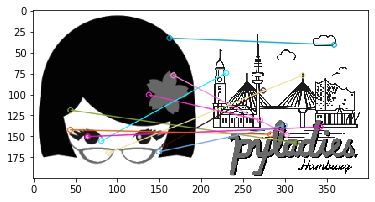

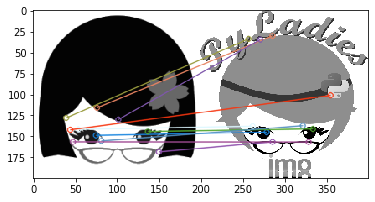

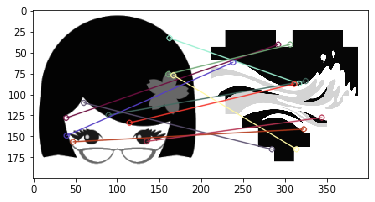

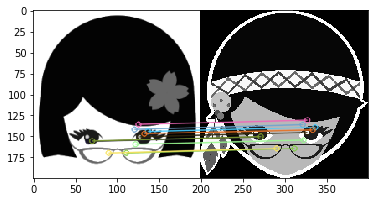

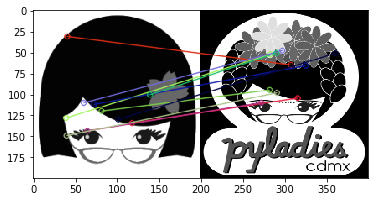

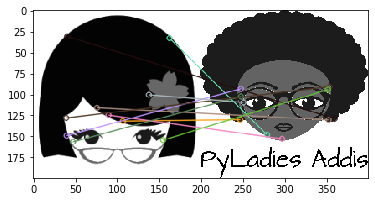

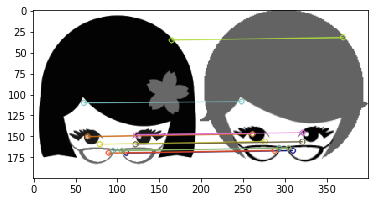

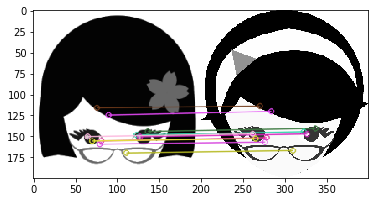

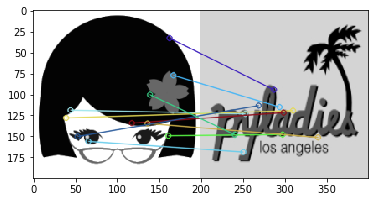

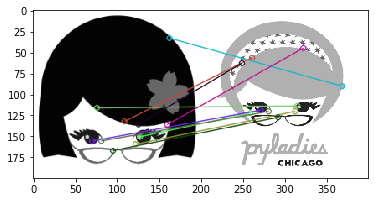

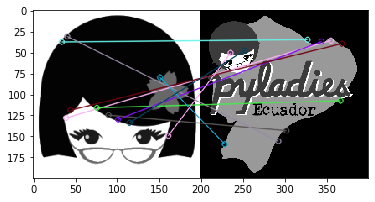

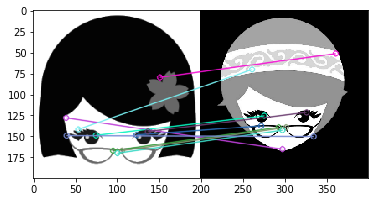

In [24]:
files = os.listdir(IMG_DIR)
result_img_dict = {}
for file in files:
    if file.startswith('pyladies'):
        comparing_img_path = IMG_DIR + file
        comparing_img = compare_akaze(target_img_gray, comparing_img_path)
        result_img_dict[file] = comparing_img
        plt.figure()
        plt.imshow(cv2.cvtColor(comparing_img, cv2.COLOR_BGR2RGB))

### 結論
東京のロゴと一番似ているのはロシアのカザンのロゴ
#### このコードでできていないこと
* 再利用できるコードの関数化

Python 2.7.16
